# PCA (análisis de componentes principales)

Vamos a ver dos aplicaciones importantes de PCA:

* Proyección de datos 2D sobre sus ejes principales: las dos direcciones  ortogonales (perpendiculares) que explican la mayor parte de la varianza.
* Reducción de dimensionalidad en datos de alta dimensión: útil para reducir carga computacional, eliminar variables redundantes y disminuir el ruido.


# Parte I: PCA en datos bidimensionales


### Cargamos las bibliotecas
Se importan las librerías necesarias para trabajar con PCA, visualización y manejo de datos.

In [1]:
# Importamos la biblioteca NumPy, que se utiliza para trabajar con arrays y operaciones matemáticas de alto rendimiento
import numpy as np

# Importamos Matplotlib para crear gráficos, especialmente útiles para visualizar datos y resultados
import matplotlib.pyplot as plt
# Importamos PCA desde scikit-learn, que nos permite aplicar el Análisis de Componentes Principales
from sklearn.decomposition import PCA

# Importamos conjuntos de datos de ejemplo desde scikit-learn, como el famoso conjunto Iris
from sklearn import datasets

# Importamos el escalador estándar para normalizar los datos antes de aplicar PCA
from sklearn.preprocessing import StandardScaler

### Creación del conjunto de datos bidimensional

Creamos un conjunto de datos en dos dimensiones que contiene dos variables correlacionadas linealmente.

Para ello, utilizarás una distribución normal bivariada, que es una extensión de la distribución normal a dos variables.

Las dos características, X1 y X2, tendrán media cero y una matriz de covarianza simétrica definida como:

\begin{equation}
\begin{pmatrix}
  3  & 2     \\\\\\\\
  2  & 2     \\
\end{pmatrix}
\end{equation}

* Los elementos de la diagonal (3 y 2) representan las varianzas de X₁ y X₂, respectivamente. Es decir, indican cuánto varía cada variable por sí sola.
* El elemento fuera de la diagonal (2) representa la covarianza entre X₁ y X₂, lo que indica cómo varían juntas. Un valor positivo sugiere que tienden a aumentar o disminuir simultáneamente.

Esta configuración permite generar datos que se distribuyen en el plano siguiendo una orientación determinada, lo que será útil para aplicar PCA y observar cómo se identifican las direcciones principales de variación.


In [2]:
# Establecemos una semilla para el generador de números aleatorios.
# Esto garantiza que los resultados sean reproducibles cada vez que se ejecute el código.
np.random.seed(42)

# Definimos la media de la distribución normal bivariada.
# En este caso, ambas variables (X1 y X2) tienen media cero.
mean = [0, 0]

# Definimos la matriz de covarianza.
# La diagonal contiene las varianzas: 3 para X1 y 2 para X2.
# Los elementos fuera de la diagonal (2) representan la covarianza entre X1 y X2.
cov = [[3, 2], [2, 2]]

# Generamos 200 muestras aleatorias siguiendo una distribución normal bivariada con la media y la matriz de covarianza especificadas.
# El resultado es un array de 200 observaciones con dos características cada una.
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

### Visualizar los datos (gráfico de dispersión - scatterplot).
Se muestra un gráfico de dispersión para observar la relación entre X1 y X2.

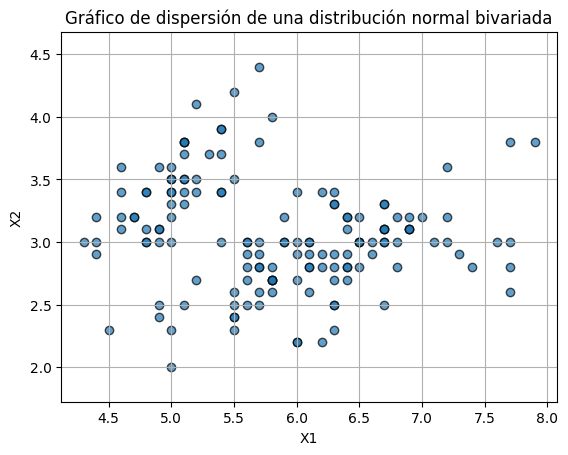

In [18]:
# Creamos una nueva figura para el gráfico
plt.figure()

# Dibujamos un gráfico de dispersión (scatter plot) con los datos generados.
# X[:, 0] representa los valores de la primera característica (X1)
# X[:, 1] representa los valores de la segunda característica (X2)
# edgecolor='k' dibuja un borde negro alrededor de cada punto
# alpha=0.7 ajusta la transparencia de los puntos
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', alpha=0.7)

# Establecemos el título del gráfico
plt.title("Gráfico de dispersión de una distribución normal bivariada")

# Etiquetamos el eje X como "X1"
plt.xlabel("X1")

# Etiquetamos el eje Y como "X2"
plt.ylabel("X2")

# Igualamos la escala de ambos ejes para que las distancias sean proporcionales
plt.axis('equal')

# Mostramos una cuadrícula de fondo para facilitar la lectura del gráfico
plt.grid(True)

# Finalmente, mostramos el gráfico en pantalla
plt.show()

### Considera la dirección principal que siguen los datos en el gráfico de dispersión
Si observas el gráfico de dispersión generado anteriormente, notarás que los datos tienden a alinearse en una dirección concreta. Esa dirección corresponde al primer componente principal: la dirección que explica la mayor parte de la variabilidad en los datos.
El Análisis de Componentes Principales (PCA) permite identificar matemáticamente esa dirección, y proyectar los datos sobre ella para simplificar su representación.

###  Aplicar PCA
A continuación, vas a inicializar un modelo de PCA con dos componentes (ya que tus datos tienen dos características) y aplicar el método fit_transform para:

1- Ajustar el modelo a los datos (calcular los componentes principales).

2- Transformar el espacio original de características al nuevo espacio definido por esos componentes.


In [4]:
# Inicializamos el modelo PCA indicando que queremos obtener 2 componentes principales
pca = PCA(n_components=2)

# Ajustamos el modelo a los datos X y transformamos el conjunto original
# Esto devuelve los datos proyectados sobre los dos componentes principales
X_pca = pca.fit_transform(X)

### Los componentes principales como ejes de máxima variación
Los componentes principales obtenidos mediante PCA representan los ejes principales del conjunto de datos. Estos ejes están definidos en el espacio de características y se alinean con las direcciones de máxima varianza.

Es decir, PCA identifica las direcciones en las que los datos varían más, y proyecta los datos sobre esos ejes para simplificar su estructura sin perder demasiada información.

El primer componente principal es la dirección que más varianza explica, y el segundo componente es ortogonal al primero y explica la siguiente mayor cantidad de varianza, y así sucesivamente.


In [5]:
# Obtenemos los componentes principales calculados por el modelo PCA.
# Cada fila del array representa un componente principal (una dirección en el espacio de características).
# En este caso, como hemos indicado n_components=2, obtendremos dos vectores (uno por componente).
components = pca.components_

# Mostramos los vectores de los componentes principales.
# Estos vectores están normalizados y apuntan en las direcciones de máxima varianza de los datos.
components


array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

Los componentes principales se ordenan de forma descendente según la varianza explicada, la cual puede expresarse como un cociente o proporción. Esta varianza explicada indica cuánto contribuye cada componente a representar la variabilidad total de los datos.


### Porcentaje de la varianza explicado por el componente principal


In [6]:

# Este atributo contiene la proporción de la varianza total que explica cada componente principal.
# Es decir, nos indica lo bien que representa cada componente la variabilidad de los datos originales.
# Los valores están ordenados de mayor a menor, ya que PCA prioriza los componentes que más información aportan.
varianza_explicada = pca.explained_variance_ratio_


array([0.9111946, 0.0888054])

Estos vectores indican las direcciones de máxima varianza. El primero explica el 91% de la varianza, el segundo el 9%.


### Mostrar los resultados
Aquí vamos a utilizar un diagrama de dispersión (scatterplot) para representar los puntos de datos en su espacio original de características, es decir, en las dimensiones X1X_1X1​ y X2X_2X2​.
También se mostrarán las proyecciones de esos puntos sobre las direcciones de los componentes principales obtenidas mediante PCA.
Este proceso requiere cierta comprensión de álgebra lineal, pero el resultado es muy ilustrativo y ayuda a entender cómo funciona la reducción de dimensionalidad.
Veamos cómo se lleva a cabo.

#### Proyección de los datos en sus componentes principales
La proyección de los datos sobre un componente principal nos da las coordenadas de cada punto en la dirección de ese componente.
Estas nuevas coordenadas se obtienen mediante el producto escalar entre las coordenadas originales de cada punto y el vector del componente principal correspondiente.
En concreto, las proyecciones se calculan como:


In [7]:
# Calculamos la proyección de los datos originales sobre el primer componente principal
# Esto se hace mediante el producto escalar entre cada punto y el vector del componente
projection_pc1 = np.dot(X, components[0])

# Calculamos la proyección de los datos sobre el segundo componente principal
# De nuevo, usamos el producto escalar para obtener las coordenadas en esa dirección
projection_pc2 = np.dot(X, components[1])

Ahora que ya tienes estas coordenadas, puedes utilizarlas para representar las proyecciones de cada punto de datos a lo largo de las direcciones principales en el espacio original de características.
En código:

In [8]:
# Calculamos las coordenadas proyectadas de cada punto sobre el primer componente principal
# Multiplicamos la proyección escalar por cada componente del vector principal
x_pc1 = projection_pc1 * components[0][0]  # Coordenada X en la dirección de PC1
y_pc1 = projection_pc1 * components[0][1]  # Coordenada Y en la dirección de PC1

# Calculamos las coordenadas proyectadas sobre el segundo componente principal
x_pc2 = projection_pc2 * components[1][0]  # Coordenada X en la dirección de PC2
y_pc2 = projection_pc2 * components[1][1]  # Coordenada Y en la dirección de PC2

#### Visualización de las proyecciones


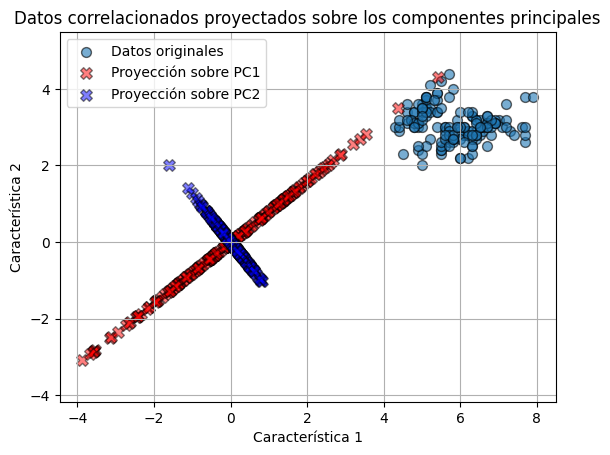

In [17]:

# Representamos los datos originales
# Creamos una nueva figura para el gráfico
plt.figure()

# Representamos los datos originales en el espacio de características (X1, X2)
# Cada punto se dibuja como un círculo con borde negro, tamaño medio y algo de transparencia
plt.scatter(X[:, 0], X[:, 1], label='Datos originales', ec='k', s=50, alpha=0.6)


# Representamos las proyecciones sobre el primer componente principal (PC1)
# Se dibujan como cruces rojas, con borde negro, mayor tamaño y algo de transparencia
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Proyección sobre PC1')


# Representamos las proyecciones sobre el segundo componente principal (PC2)
# Se dibujan como cruces azules, con las mismas características que las anteriores
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Proyección sobre PC2')


# Título y etiquetas en español
plt.title('Datos correlacionados proyectados sobre los componentes principales') # Título
plt.xlabel('Característica 1') # Etiqueta eje x
plt.ylabel('Característica 2') # Etiqueta eje y


# Mostramos la leyenda para identificar cada grupo de puntos
plt.legend()

# Activamos la cuadrícula para facilitar la lectura del gráfico
plt.grid(True)

# Igualamos la escala de los ejes X e Y para que las distancias sean proporcionales
plt.axis('equal')


# Mostramos el gráfico
plt.show()


Ahora puedes ver claramente qué significan las coordenadas principales.
Los datos varían principalmente en dos direcciones:

La primera dirección, representada en rojo, está alineada con la dirección en la que los datos presentan la mayor variabilidad. Es decir, es la dirección que más información aporta sobre cómo se dispersan los datos.

### Descripción de la segunda dirección
La segunda dirección, en azul, es perpendicular a la primera y tiene una varianza menor.

Representa la segunda mayor fuente de variación en los datos. Aunque explica menos varianza que la primera, sigue siendo relevante para capturar patrones que no se observan en el primer componente.

Esta segunda dirección permite identificar diferencias más sutiles entre los puntos, y es especialmente útil cuando los datos tienen estructura en más de una dimensión.

# Parte II: PCA en el conjunto de datos Iris
Ahora utilizaremos el Análisis de Componentes Principales (PCA) para proyectar el conjunto de datos de características del Iris, que tiene cuatro dimensiones, a un espacio de características bidimensional.

Esto tendrá además la ventaja de permitirte visualizar algunas de las estructuras más importantes del conjunto de datos.

### Carga y preprocesamiento de los datos Iris


In [10]:
# Cargar el conjunto de datos Iris
iris = datasets.load_iris()  # Se carga el dataset Iris incluido en scikit-learn
X = iris.data                # Se extraen las características (longitud y anchura de sépalos y pétalos)
y = iris.target              # Se extraen las etiquetas (las especies de flores)
target_names = iris.target_names  # Se obtienen los nombres de las especies

# Estandarizar los datos
scaler = StandardScaler()           # Se crea un objeto para escalar los datos
X_scaled = scaler.fit_transform(X)  # Se ajusta el escalador a los datos y se transforman para que tengan media 0 y desviación estándar 1

### Nombres de las flores


In [13]:
target_names = iris.target_names  # Array con los nombres de las especies de flores: 'setosa', 'versicolor' y 'virginica'

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Reducción a 2 dimensiones con el modelo PCA

In [15]:
# Aplicar PCA y reducir el conjunto de datos a 2 componentes principales
pca = PCA(n_components=2)            # Se crea un objeto PCA para reducir a 2 dimensiones
X_pca = pca.fit_transform(X_scaled)  # Se ajusta el modelo PCA a los datos escalados y se transforma el conjunto de datos

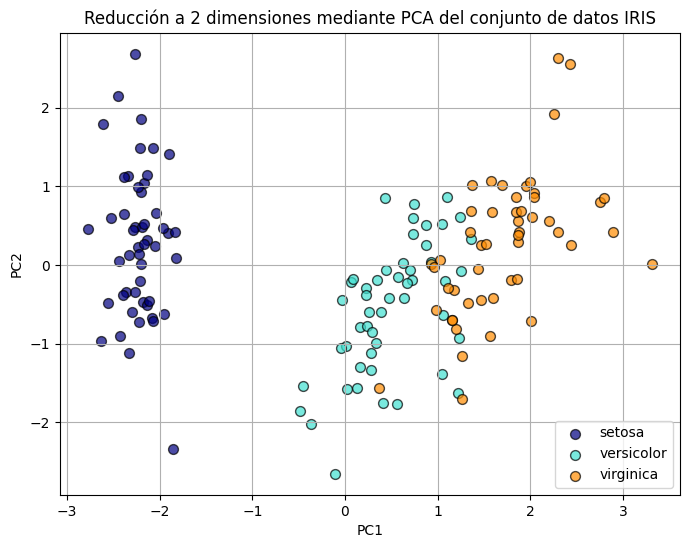

In [19]:
# Representar gráficamente los datos transformados por PCA en 2D
plt.figure(figsize=(8,6))  # Se define el tamaño de la figura
colors = ['navy', 'turquoise', 'darkorange']  # Colores para cada clase
lw = 1  # Grosor del borde de los puntos

# Se recorren los colores, índices de clase y nombres de las especies
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    # Se dibujan los puntos correspondientes a cada clase en el plano 2D
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k', alpha=0.7, lw=lw,
                label=target_name)

plt.title('Reducción a 2 dimensiones mediante PCA del conjunto de datos IRIS')  # Título del gráfico
plt.xlabel("PC1")  # Etiqueta del eje X (primer componente principal)
plt.ylabel("PC2")  # Etiqueta del eje Y (segundo componente principal)
plt.legend(loc='best', shadow=False, scatterpoints=1)  # Leyenda con los nombres de las especies
plt.grid(True)  # Activa la cuadrícula
plt.show()  # Mostrar el gráfico

## Reflexión ¿Se han separado bien teniendo en cuenta solo los dos principales componentes?
Al observar el gráfico:

* Setosa (en azul marino) está claramente separada de las otras dos clases, lo que indica que sus características son muy distintas y PCA ha captado bien esa diferencia.
* Versicolor (turquesa) y Virginica (naranja oscuro) están más solapadas, lo que sugiere que sus características son más similares entre sí y que la reducción a dos dimensiones no permite una separación perfecta entre ellas.

Aun así, se puede ver cierta estructura y agrupamiento, lo que demuestra que PCA ha logrado conservar parte de la información relevante del conjunto original de 4 dimensiones.



### Análisis de la varianza explicada.


In [20]:
# Calcular el porcentaje total de varianza explicada por los dos primeros componentes principales
# Se multiplica por 100 la suma de los valores individuales de varianza explicada
100 * pca.explained_variance_ratio_.sum()

np.float64(95.81320720000166)

Los dos primeros componentes principales del PCA explican aproximadamente el 95.81 % de la varianza total del conjunto de datos Iris.
🔍 Esto significa que aunque reduciendo de 4 a 2 dimensiones, se conserva casi toda la información relevante del conjunto original, lo que justifica la buena separación visual observada en el gráfico.

### Reinicializar el modelo PCA sin reducir la dimensión
Estandarizamos los datos del conjunto Iris, y ajustamos y transformamos los datos escalados.


In [21]:
# Estandarizar los datos
scaler = StandardScaler()           # Se crea un objeto para escalar los datos
X_scaled = scaler.fit_transform(X)  # Se ajusta el escalador a los datos y se transforman para que tengan media 0 y desviación estándar 1

# Aplicar PCA
pca = PCA()                         # Se crea un objeto PCA sin especificar el número de componentes (se conservarán todas)
X_pca = pca.fit_transform(X_scaled) # Se ajusta el modelo PCA a los datos escalados y se transforma el conjunto completo

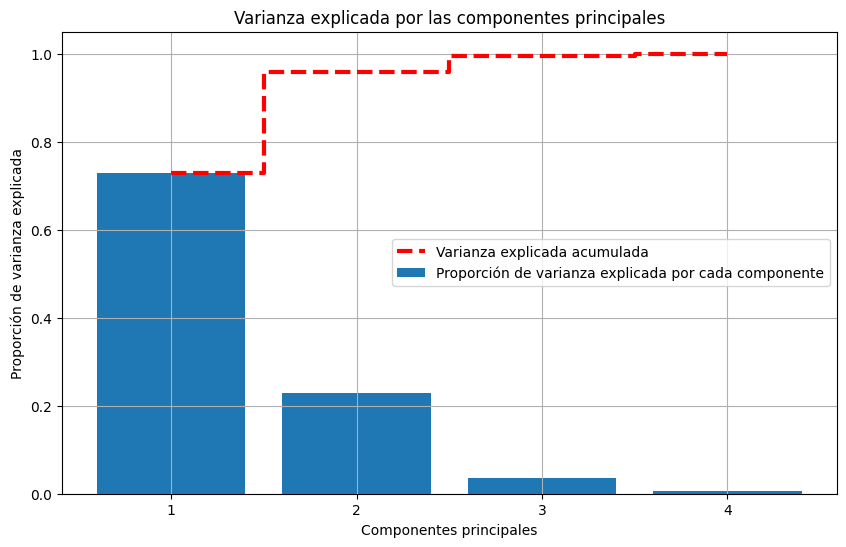

In [22]:

# Obtener la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Representar la varianza explicada por cada componente como un diagrama de barras
plt.figure(figsize=(10,6))  # Se define el tamaño de la figura
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center',
        label='Proporción de varianza explicada por cada componente')  # Se dibujan las barras
plt.ylabel('Proporción de varianza explicada')  # Etiqueta del eje Y
plt.xlabel('Componentes principales')           # Etiqueta del eje X
plt.title('Varianza explicada por los componentes principales')  # Título del gráfico


# Representar la varianza explicada acumulada como una línea discontinua
cumulative_variance = np.cumsum(explained_variance_ratio)  # Se calcula la suma acumulada
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3, color='red',
         label='Varianza explicada acumulada')  # Se dibuja la línea de acumulación

# Mostrar solo valores enteros en el eje X
plt.xticks(range(1, 5))
plt.legend()      # Mostrar la leyenda
plt.grid(True)    # Activar la cuadrícula
plt.show()        # Mostrar el gráfico

* ¿Qué te indica la línea roja discontinua?
La línea roja discontinua representa la varianza explicada acumulada por los componentes principales. Es decir, muestra cuánto de la información total del conjunto de datos se conserva al ir sumando componentes principales uno en uno.

* ¿Qué considerarías hacer si quisieras suprimir algo de ruido en tus datos?
Si quisieras reducir el ruido en tus datos, podrías considerar:

  * Reducir la dimensionalidad conservando solo los primeros componentes principales que explican la mayor parte de la varianza. Por ejemplo, si los dos primeros componentes explican más del 95 % de la varianza, podrías eliminar los restantes que aportan poco y podrían estar capturando ruido.
  * Aplicar técnicas de filtrado o suavizado antes del PCA, como eliminar valores atípicos o normalizar adecuadamente.
  * Evaluar la varianza explicada para decidir cuántos componentes conservar, usando un umbral (por ejemplo, conservar componentes que expliquen al menos el 95 % de la varianza total).
